### Wholesale Customers Segmentation
(Part of the Machine Learning Engineer Nanodegree)

The goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The notebook is organized as below:

1. Data Exploration 
2. Data Preprocessing
3. Feature Transformation
4. Clustering

Dataset Details :

Attribute Information:

1. FRESH: annual spending (m.u.) on fresh products (Continuous)
2. MILK: annual spending (m.u.) on milk products (Continuous)
3. GROCERY: annual spending (m.u.)on grocery products (Continuous)
4. FROZEN: annual spending (m.u.)on frozen products (Continuous)
5. DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6. DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous)
7. CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8. REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

Descriptive Statistics:

(Minimum, Maximum, Mean, Std. Deviation)
1. FRESH ( 3, 112151, 12000.30, 12647.329)
2. MILK (55, 73498, 5796.27, 7380.377)
3. GROCERY (3, 92780, 7951.28, 9503.163)
4. FROZEN (25, 60869, 3071.93, 4854.673)
5. DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
6. DELICATESSEN (3, 47943, 1524.87, 2820.106)

REGION Frequency
1. Lisbon 77
2. Oporto 47
3. Other Region 316

Total 440

CHANNEL Frequency
1. Horeca 298
2. Retail 142

Total 440 

### Data Exploration

In [178]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [179]:
# Import dataset
df = pd.read_csv('Wholesale customers data.csv')

# Drop Channel and Region as we will not be using this 
df.drop(['Channel', 'Region'], axis=1, inplace=True)

# Display details of the dataset 
print('Dataset has {} samples with {} features each.'.format(*df.shape))
df.head()

Dataset has 440 samples with 6 features each.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [180]:
# Quick look at the statistical details of each feature
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [181]:
# Select a few sample data points to explore in further deatail
indices = [5,10,392]

samples = pd.DataFrame(df.loc[indices], columns=df.keys()).reset_index(drop=True)
samples.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9413,8259,5126,666,1795,1451
1,3366,5403,12974,4400,5977,1744
2,518,4180,3600,659,122,654


Looking at the above output we may be able to estimate what kind of establishment (customer) each of the three samples represent:

- Index 5 (0) :  There is a large amount of Fresh, Milk and Grocery ordered while Frozen is relatively small amount suggesting that this is perhaps a **retaurant** where food is prepared fresh. The larger amounts are below the respective means suggesting that it is a small establishment. 
- Index 10 (1) :  There is a significant amount of all items but especially Grocery suggesting that it may be a supermarket / convenient store where they stock up on all items. Frozen and Detergents_Paper are above mean numbers also suggesting that the establishment keeps long term durable items but also have above average Deli items - suggesting perhaps more a **supermarket** than a convenient store with a Deli counter. 
- Index 392 (2) :  All items are relatively low amounts. The high amount of Milk would suggest a **cafe** perhaps. The low amount of Frozen and Fresh items suggests that it has limited food offerings. 



#### Feature Relevance

We will now check if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products.

For this we will train a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# Make a copy of the DataFrame, using the 'drop' function to drop the given feature
newDF = df.drop('Frozen', axis=1, inplace=False)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(newDF, df['Frozen'], test_size=.25, random_state=0)

# Create a decision tree regressor and fit it to the training set
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = reg.score(X_test, y_test)
print('Score :', score)

Score : 0.253973446697


#### Feature Relevance Prediction

We have tried to predict the Frozen feature from the spending on other categories. 

We got a R2 score of 0.25. This mean that the customer's spending habits on other items don't give a good prediction on how they spend on Frozen. Hence, we can say that the Frozen feature is important in identifying customer habits as it gives high information gain. 

If we were to look at Grocery for instance we get a R2 score of 0.60 and Detergents_Paper give a score of 0.72 suggesting these items correlate well with the other features, suggesgting a low information gain. 

#### Visualize Feature Distributions

We will create a pairplot and a heatmap to see the feature distributions and glean any correlations between them.

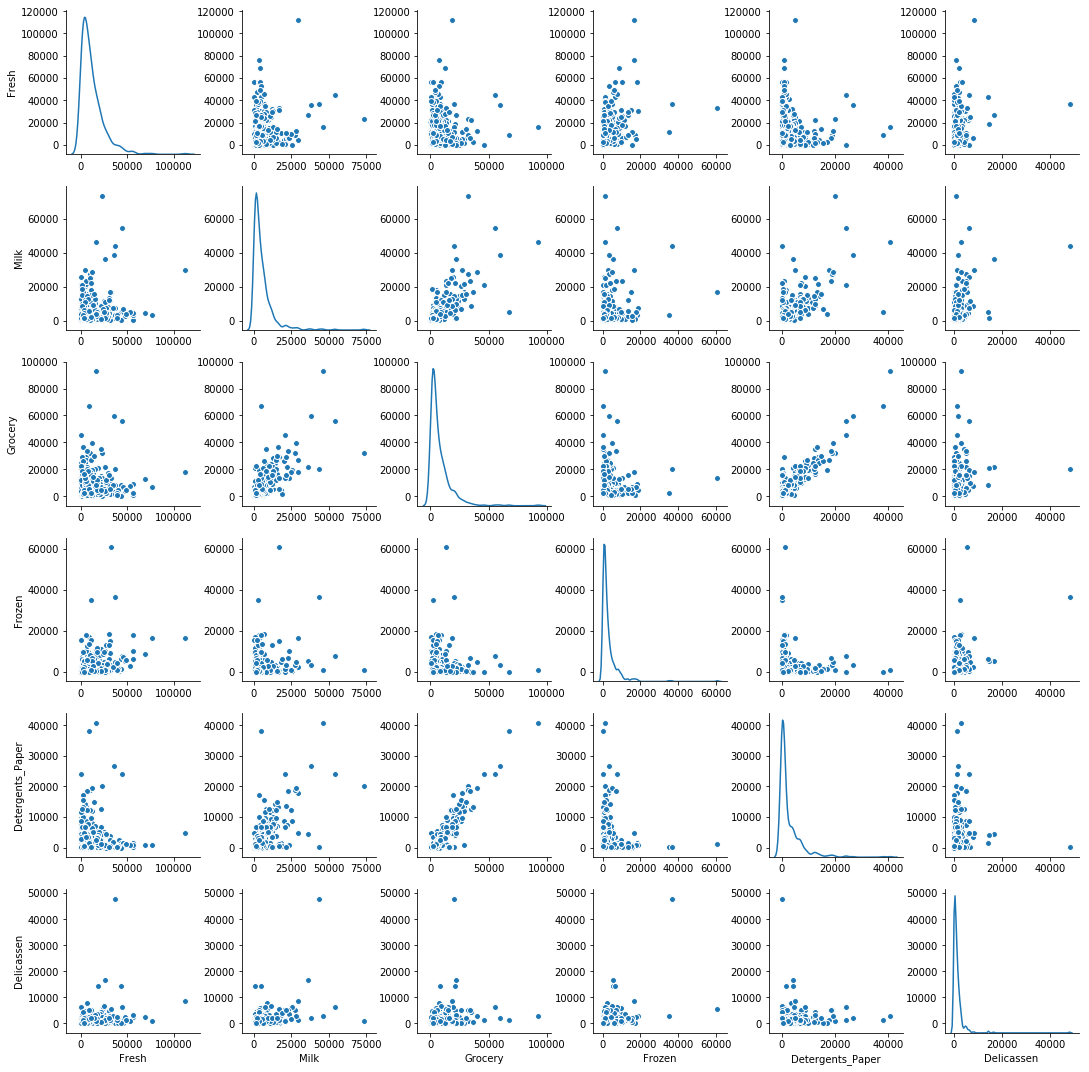

In [183]:
sns.pairplot(df, diag_kind='kde')

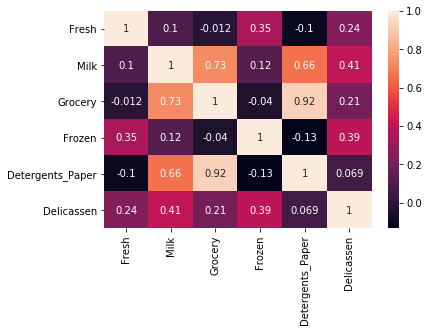

In [184]:
sns.heatmap(df.corr(), annot=True)

We can see here that Grocery and Detergents_Paper are highly correlated (0.92) and have a linear relationship. 
Detergents_Paper and Milk also have a linear correlation (0.66). 
Lastly, Grocery and Milk have a linear correlation as well (0.73).

As we checked Frozen before, this reaffirms that it is not highly correlated  with any of the features. It shows mild correlation with Fresh and Deli. 

The distribution of all the features appears to be strongly right skewed and don't follow a normal profile. THis may indicate that many of the customers are smaller establishments. 

### Data Preprocessing

We will scale the data and remove outliers.

#### Feature Scaling

We will transform the data by applying a natural logarithm to it. 

In [185]:
# Scale the data using the natural logarithm
log_df = np.log(df)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

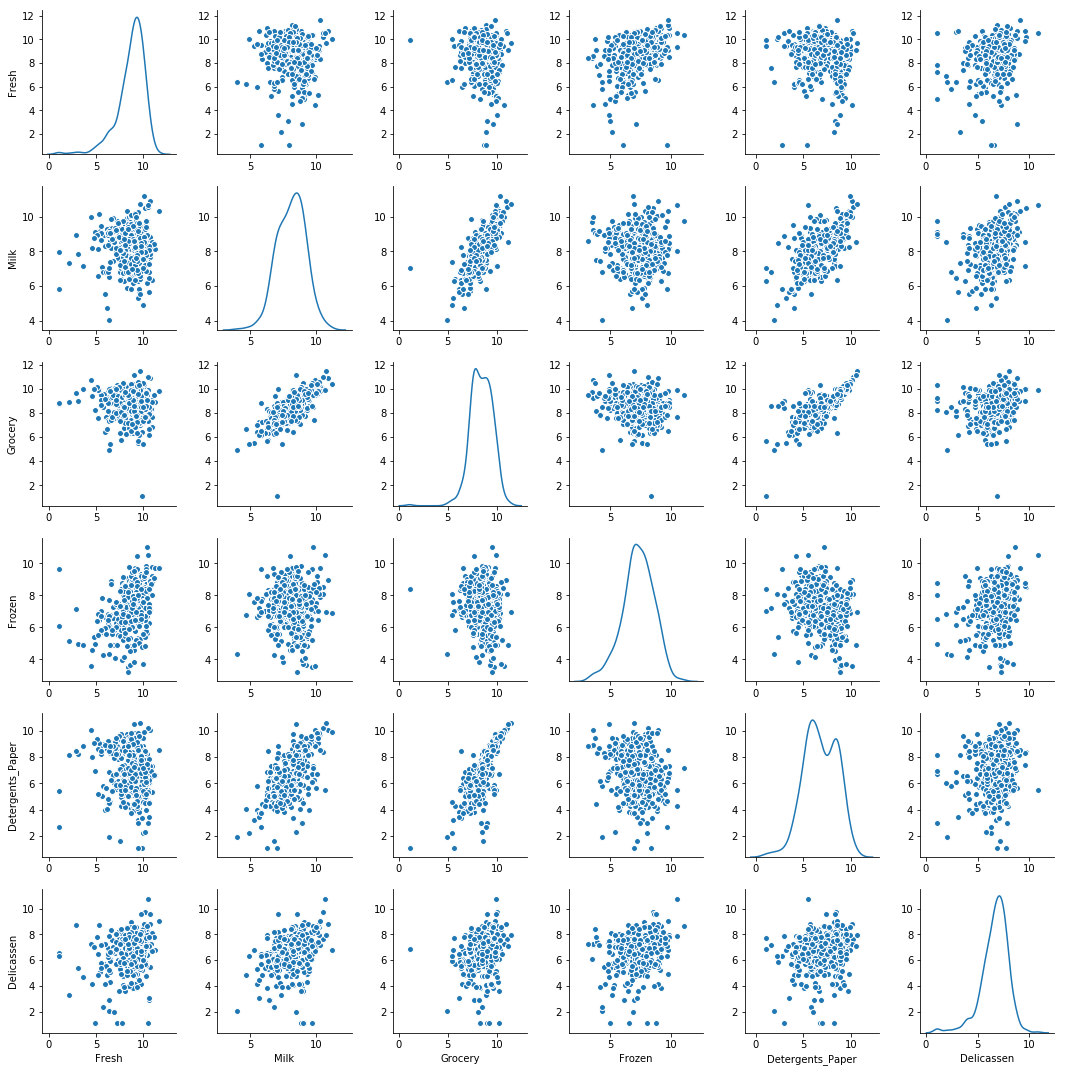

In [186]:
# Produce a pairplot for each pair of newly-transformed features
sns.pairplot(log_df, diag_kind='kde')

After the log transformation, the distributions appear more normal. 

In [187]:
# Display the log-transformed sample data
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,6.249975,8.338067,8.188689,6.490724,4.804021,6.483107


#### Outliers

We will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [188]:
# List of all outliers
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_df.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_df[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_df[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature {} :".format(feature))
    feature_outliers = log_df[~((log_df[feature] >= Q1 - step) & (log_df[feature] <= Q3 + step))]
    display(feature_outliers)
    
    outliers += feature_outliers.index.tolist()
    
# Remove the outliers
good_data = log_df.drop(log_df.index[outliers]).reset_index(drop = True)
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Outlier step: 2.53350786861
Data points considered outliers for the feature Fresh :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outlier step: 2.31824827282
Data points considered outliers for the feature Milk :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier step: 2.3988562138
Data points considered outliers for the feature Grocery :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier step: 2.34932750101
Data points considered outliers for the feature Frozen :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outlier step: 4.08935876094
Data points considered outliers for the feature Detergents_Paper :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier step: 2.24228065442
Data points considered outliers for the feature Delicassen :


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Number of outliers (inc duplicates):  48
New dataset with removed outliers has 398 samples with 6 features each.


We can see that several points were outliers for more than one feature:

- 154: An outlier for Delicatessen, Milk and Grocery
- 128: An outlier for Delicatessen and Fresh
- 75: An outlier for Detergents_Paper and Grocery
- 66: An outlier for Delicatessen and Fresh
- 65: An outlier for Frozen and Fresh

These points fall well below the IQR and cause skewed data in multiple features.
These points are very different to the 'samples' we picked earlier. 

### Feature Transformation

We will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.


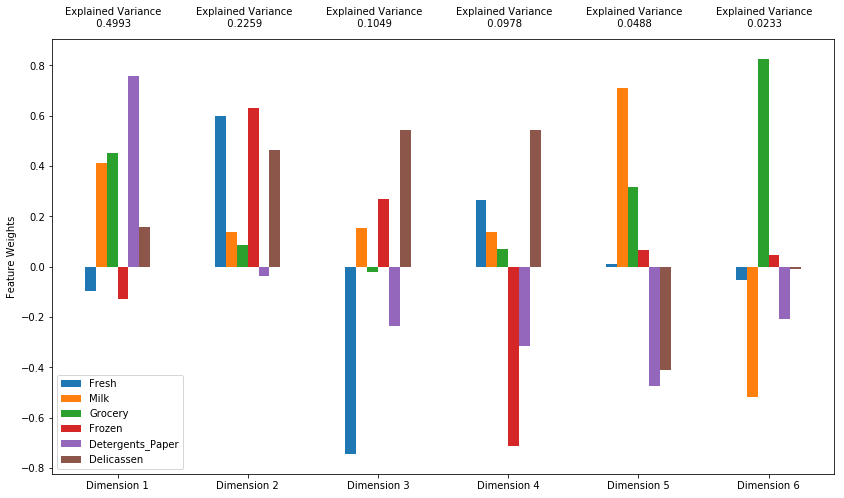

In [189]:
from sklearn.decomposition import PCA
import visuals2 as vs2

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6) 
pca.fit(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs2.pca_results(good_data, pca)

The first 2 components explain about 72.5% of the variance.
The first 4 components explain about 92.8% of the variance. 

Each component represents different sections of customer spending

- 1st PC has a high positive weight for Detergents_Paper, Milk and Grocery and Delicatassen to some extent. However, it badly predicts Fresh and Frozen categories and needs another component to help. This could represent a supermarket spending category.
- 2nd PC has a high positive weight for Fresh, Frozen and Delicatessen. It provides small gains for Milk and Grocery. This could represent customers who are in the hospitality or restaurant industry.
- 3rd PC has a positive weight for Delicatessen, Frozen and Milk. But a very strong negative weight for Fresh. This may represent a deli. 
- 4th PC has a positive weight for Delicatessen, Fresh, Milk and Grocery. This could represent a corner shop. 


In [190]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1335,-0.1257,-0.1789,0.8899,0.0844,-0.5694
1,2.1793,0.5069,0.8243,-1.0031,-0.4516,0.3107
2,-1.1893,-2.2661,2.0807,0.4201,1.0561,0.2148


#### Dimensionality Reduction

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


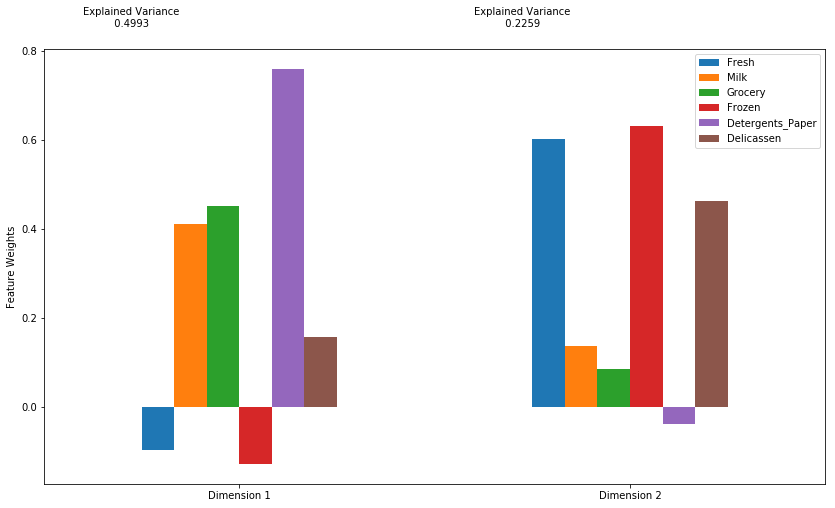

In [191]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
vs.pca_results(good_data, pca)

In [192]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.1335,-0.1257
1,2.1793,0.5069
2,-1.1893,-2.2661


#### Visualizing a Biplot

A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case Dimension 1 and Dimension 2). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

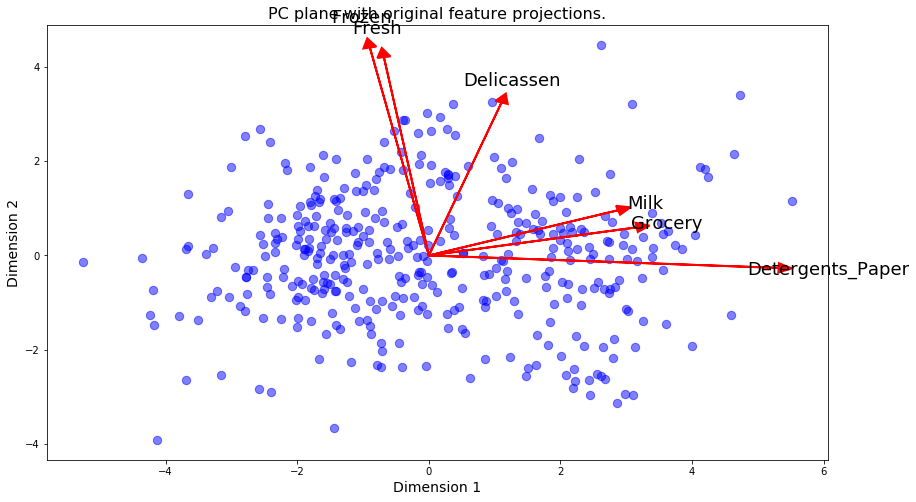

In [193]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

From the original feature predictions (red) we can somehwat deduce where each point may fall. For instance, points in the lower right corner would be customrs who order more Detergents_Paper, Grocery, Milk.

### Clustering

Gaussian Mixture Model clustering:

- Good for estimating soft clusters 
- Does not bias the cluster sizes to have specific structures in the cluster that may or may not exist.

Given the above scatter plot, the data appears to be quite uniform. A lot of data points don't clearly belong to one particular cluster or another, so it seems more logical to adopt a Gaussian Mixture Model in this case.


#### Creating Clusters

Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known a priori, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's silhouette coefficient. The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

In [194]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def produceGMM(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=k, random_state=0)
    clusterer.fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # Find the cluster centers
    centers = clusterer.means_ 
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,16):
    score = produceGMM(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)

Number of Clusters,Silhouette Score
2,0.446754
3,0.352561
4,0.315138
5,0.313569
6,0.338435
7,0.249866
8,0.319922
9,0.343773
10,0.316840
11,0.330908


From the results above we can se that a GMM with 2 clusters gives the best silhouette score. 

#### Cluster Visualization

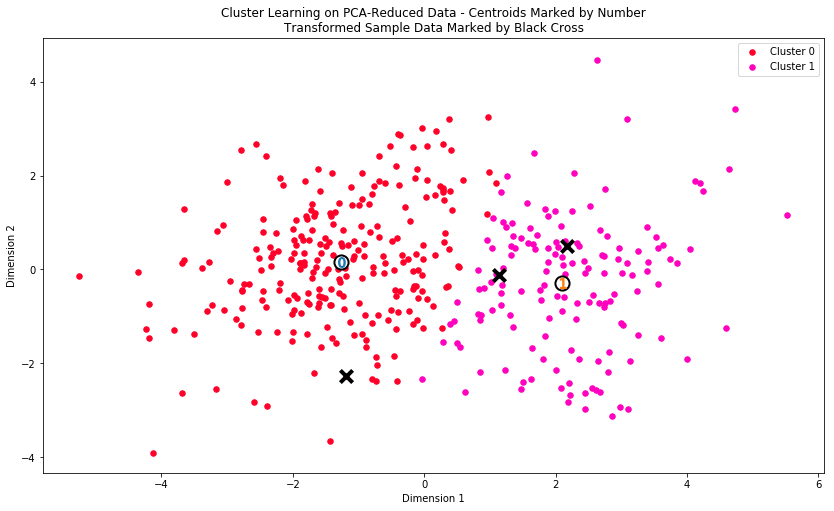

In [195]:
# Use the optimal cluster we found previously
produceGMM(2)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

#### Data Recovery

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [196]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,9494.0,2049.0,2598.0,2203.0,337.0,796.0
Segment 1,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0


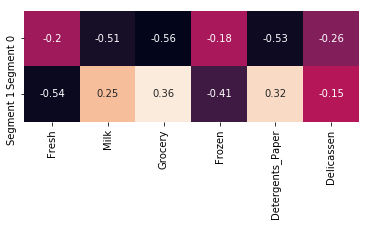

In [197]:
sns.heatmap((true_centers-df.mean())/df.std(ddof=0),
            square=True, annot=True, cbar=False)

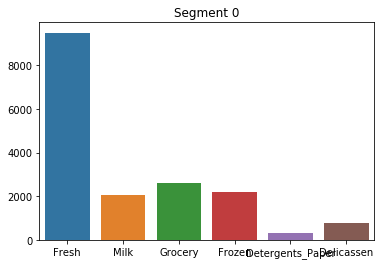

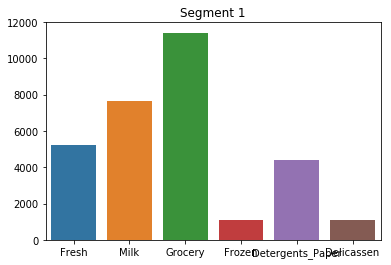

In [198]:
plt.figure()
plt.axes().set_title("Segment 0")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[0].values)

plt.figure()
plt.axes().set_title("Segment 1")
sns.barplot(x=true_centers.columns.values,y=true_centers.iloc[1].values)


- **Cluster/Segment 0**: This most likely represents cafes/restaurants serving fresh food due to the strong weight upon the Fresh category.
- **Cluster/Segment 1**: The quantities of Grocery and Milk are predominant here. The Milk and Grocery values in this cluster exceed the overall means observed in the Data Exploration section, which suggests they are bulk distributors or large resellers such as supermarkets.


Which segments do the samples belong to:

In [199]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)



Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


Index 5 (0)
- Previous assessment: Restaurant 
- Model assessment: Bulk Distributor/Supermarket
- Comments: We are inconsistent with this prediction as we took the predominance of Milk and Fresh to mean a restaurant

Index 10 (1)
- Previous assessment: Supermarket
- Model assessment: Bulk Distributor/Supermarket
- Comments: The prediction is same as our assessment

Index 392 (2)
- Previous assessment: Cafe
- Model assessment: Cafe/Restaurant
- Comments: The prediction is same as our assessment.

The model seems to perform relatively well. The model seems to take the opinion that a customer with a variety of prominent features - Fresh, Milk, Grocery, Frozen etc suggests that it is Cluster 1 (Supermarket or Retailer of some sort). Customers with a particular focus on a single feature - Fresh - are regarded as Cluster 0 (Restaurant/Cafes). which seems like a logical interpretation of the data.

This concludes the project on customer segmentation. 